In [1]:
import numpy as np
import matplotlib.pyplot as plt
from advait_solver import *

(108, 2)


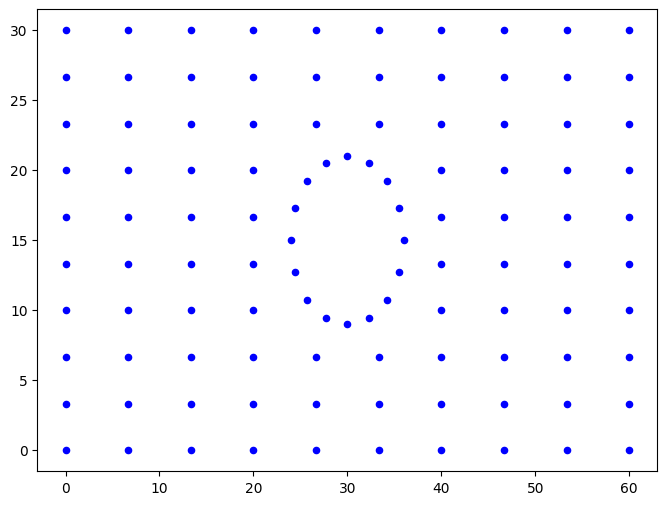

In [2]:
#points for the domain generated in the node_set as:
point_density = 10 #20
hole_nodes = 17 #21
width = 60
height = 30
hole_radius = int(0.1*width)
hole_center = (width/2,height/2)
buffer = 0.3#0.3 # this buffer ensures that the rectangular and circular points are not too close
x_points = np.linspace(0, width, point_density)
y_points = np.linspace(0, height, point_density)
theta = np.linspace(0,2*np.pi, hole_nodes)
hole_points = np.array([hole_center + hole_radius * np.array([np.cos(t), np.sin(t)]) for t in theta[:-1]]) #you need to remove the last theta(2pi)
rectangular_points = np.array([[x, y] for x in x_points for y in y_points])

mask =  np.linalg.norm(rectangular_points - hole_center, axis=1) >= hole_radius + buffer

filtered_points = rectangular_points[mask]
node_set = np.vstack([filtered_points,hole_points])

print(np.shape(node_set))

plt.figure(figsize=(8, 6))
plt.scatter(node_set[:, 0], node_set[:, 1], color='blue', label="Rectangular Points (outside hole)", s=20)
#plt.scatter(hole_points[:, 0], hole_points[:, 1], color='red', label="Hole Boundary Points", s=50)
plt.show()

In [3]:
node_set

array([[ 0.        ,  0.        ],
       [ 0.        ,  3.33333333],
       [ 0.        ,  6.66666667],
       [ 0.        , 10.        ],
       [ 0.        , 13.33333333],
       [ 0.        , 16.66666667],
       [ 0.        , 20.        ],
       [ 0.        , 23.33333333],
       [ 0.        , 26.66666667],
       [ 0.        , 30.        ],
       [ 6.66666667,  0.        ],
       [ 6.66666667,  3.33333333],
       [ 6.66666667,  6.66666667],
       [ 6.66666667, 10.        ],
       [ 6.66666667, 13.33333333],
       [ 6.66666667, 16.66666667],
       [ 6.66666667, 20.        ],
       [ 6.66666667, 23.33333333],
       [ 6.66666667, 26.66666667],
       [ 6.66666667, 30.        ],
       [13.33333333,  0.        ],
       [13.33333333,  3.33333333],
       [13.33333333,  6.66666667],
       [13.33333333, 10.        ],
       [13.33333333, 13.33333333],
       [13.33333333, 16.66666667],
       [13.33333333, 20.        ],
       [13.33333333, 23.33333333],
       [13.33333333,

In [84]:
mesh = Mesh(node_set)
mesh.element_list = []

tri = Delaunay(node_set)
#print(tri.simplices)
for simplex in tri.simplices:
    if (node_set[simplex][0] not in hole_points) or (node_set[simplex][1] not in hole_points) or (node_set[simplex][2] not in hole_points):
        #pass
        mesh.element_list.append(Trielement(node_set[simplex[0]],node_set[simplex[1]],node_set[simplex[2]],simplex[0],simplex[1],simplex[2]))
        #print(simplex)
    #print(node_set[simplex][0])
    #print("")t_node = False,plot_element = True)

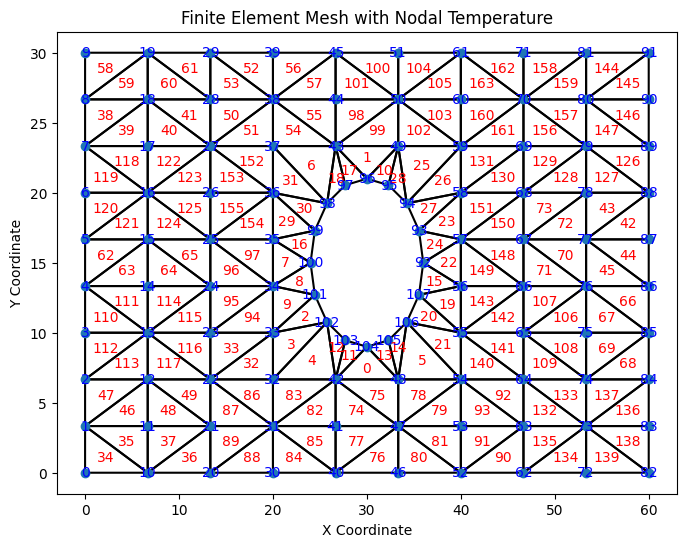

In [85]:
mesh.plot_mesh()

In [86]:
num_elements = len(mesh.element_list)
print("Number of elements used in mesh:",num_elements)
print("Number of nodes used in mesh:",mesh.num_nodes)

Number of elements used in mesh: 164
Number of nodes used in mesh: 108


In [87]:
ebc_1 = []
for i, x in enumerate(node_set):
    if x[0] == 0:
        ebc_1.append(i)

ebc_2 = []
for i, x in enumerate(node_set):
    if x[0] == width:
        ebc_2.append(i)

print("Node set used for application of essential boundary condition at x=0:", ebc_1)
print(f"Node set used for application of essential boundary condition at x={width}:", ebc_2)

Node set used for application of essential boundary condition at x=0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Node set used for application of essential boundary condition at x=60: [82, 83, 84, 85, 86, 87, 88, 89, 90, 91]


In [88]:
mesh.ebc_nodes = ebc_1

In [89]:
mesh.calc_global_stiffness()

Element No. 0
Nodes id used  [np.int32(104), np.int32(42), np.int32(48)]
Element No. 1
Nodes id used  [np.int32(43), np.int32(96), np.int32(49)]
Element No. 2
Nodes id used  [np.int32(33), np.int32(102), np.int32(101)]
Element No. 3
Nodes id used  [np.int32(102), np.int32(33), np.int32(32)]
Element No. 4
Nodes id used  [np.int32(42), np.int32(102), np.int32(32)]
Element No. 5
Nodes id used  [np.int32(54), np.int32(106), np.int32(48)]
Element No. 6
Nodes id used  [np.int32(98), np.int32(43), np.int32(37)]
Element No. 7
Nodes id used  [np.int32(35), np.int32(34), np.int32(100)]
Element No. 8
Nodes id used  [np.int32(100), np.int32(34), np.int32(101)]
Element No. 9
Nodes id used  [np.int32(34), np.int32(33), np.int32(101)]
Element No. 10
Nodes id used  [np.int32(96), np.int32(95), np.int32(49)]
Element No. 11
Nodes id used  [np.int32(104), np.int32(103), np.int32(42)]
Element No. 12
Nodes id used  [np.int32(103), np.int32(102), np.int32(42)]
Element No. 13
Nodes id used  [np.int32(105), n

In [90]:
mesh.reduce_global_stiffness()

In [99]:
mesh.force_matrix[ebc_2] = 3.0

In [100]:
mesh.global_displacement = np.linalg.solve(mesh.global_stiffness_matrix,mesh.force_matrix)

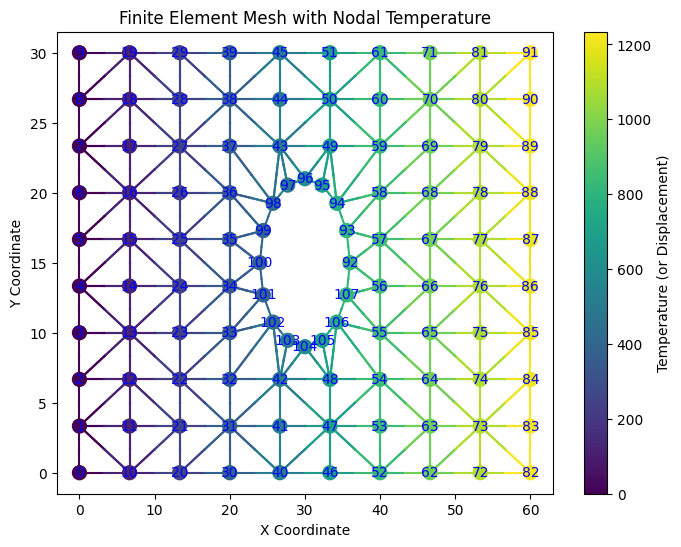

In [101]:
mesh.plot_mesh(plot_element=False,plot_node=False,plot_temperature=True)

In [53]:
from advait_solver import *
import numpy as np
from sympy import *

In [54]:
a = 15 #mm (taken from example problem in lecture 16-17)
alpha = 0 #temperature at node 0 is given (alpha in the problem)
node_set = np.array([[0,0],[2*a,0],[4*a,0],[4*a,2*a],[2*a,2*a],[0,2*a],[3*a, a],[a,a]]) # set of nodes forming the mesh
display(k) # k is the stiffness matrix it can be edited in the advait_solver library
#k = 0.056*[Identity Matrix] #Watt/mmC
beta = 0.2 #Watt/mm^2  # heat flux into the volume

Matrix([
[0.056,     0],
[    0, 0.056]])

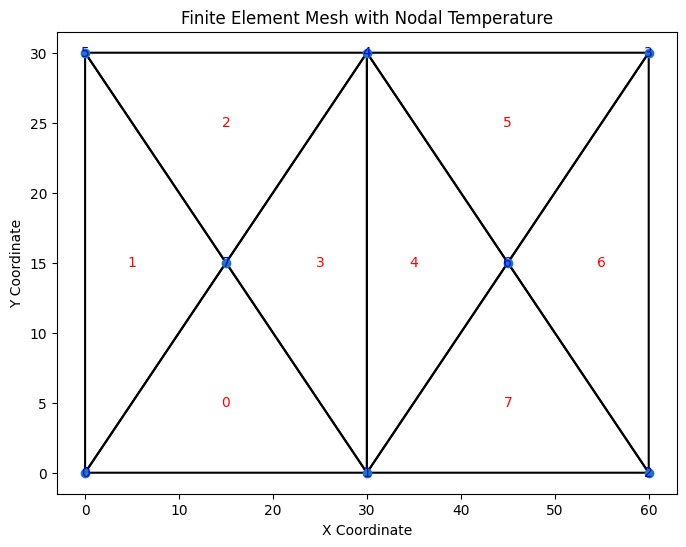

In [55]:
mesh = Mesh(node_set)
element_coordinates = [[0,1,7],[0,5,7],[4,5,7],\
                       [7,1,4],[1,4,6],[3,6,4],\
                       [6,2,3],[1,2,6]]
 #this is a list of nodes that form the elements for the problem

# the element co-ordinates variable is made to create elements from given set of three node_points
mesh.element_list = []  #element list contains instances of Triangular element objects (Trielement) as defined in advait_solver.py

for element_points in element_coordinates:
    mesh.element_list.append(Trielement(node_set[element_points[0]],node_set[element_points[1]],node_set[element_points[2]],element_points[0],element_points[1],element_points[2]))
mesh.plot_mesh()

In [56]:
mesh.calc_global_stiffness()

Element No. 0
Nodes id used  [0, 1, 7]
Element No. 1
Nodes id used  [0, 5, 7]
Element No. 2
Nodes id used  [4, 5, 7]
Element No. 3
Nodes id used  [7, 1, 4]
Element No. 4
Nodes id used  [1, 4, 6]
Element No. 5
Nodes id used  [3, 6, 4]
Element No. 6
Nodes id used  [6, 2, 3]
Element No. 7
Nodes id used  [1, 2, 6]


In [57]:
ebc_1 = [2,3]
ebc_2 = [0,5]

mesh.ebc_nodes = ebc_2

In [58]:
mesh.reduce_global_stiffness()

In [59]:
print(mesh.global_stiffness_matrix)

[[ 1.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.112  0.     0.     0.     0.    -0.056 -0.056]
 [ 0.     0.     0.056  0.     0.     0.    -0.056  0.   ]
 [ 0.     0.     0.     0.056  0.     0.    -0.056  0.   ]
 [ 0.     0.     0.     0.     0.112  0.    -0.056 -0.056]
 [ 0.     0.     0.     0.     0.     1.     0.     0.   ]
 [ 0.    -0.056 -0.056 -0.056 -0.056  0.     0.224  0.   ]
 [ 0.    -0.056  0.     0.    -0.056  0.     0.     0.224]]


In [60]:
mesh.force_matrix[ebc_1] = 3
mesh.force_matrix[ebc_2] = 0

In [61]:
print(mesh.force_matrix)

[0. 0. 3. 3. 0. 0. 0. 0.]


In [62]:
mesh.global_displacement = np.linalg.solve(mesh.global_stiffness_matrix,mesh.force_matrix)
display(Matrix(mesh.global_displacement))

Matrix([
[             0.0],
[107.142857142857],
[214.285714285714],
[214.285714285714],
[107.142857142857],
[             0.0],
[160.714285714286],
[53.5714285714286]])

In [63]:
mesh.global_stiffness_matrix

array([[ 1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.112,  0.   ,  0.   ,  0.   ,  0.   , -0.056, -0.056],
       [ 0.   ,  0.   ,  0.056,  0.   ,  0.   ,  0.   , -0.056,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.056,  0.   ,  0.   , -0.056,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.112,  0.   , -0.056, -0.056],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ],
       [ 0.   , -0.056, -0.056, -0.056, -0.056,  0.   ,  0.224,  0.   ],
       [ 0.   , -0.056,  0.   ,  0.   , -0.056,  0.   ,  0.   ,  0.224]])

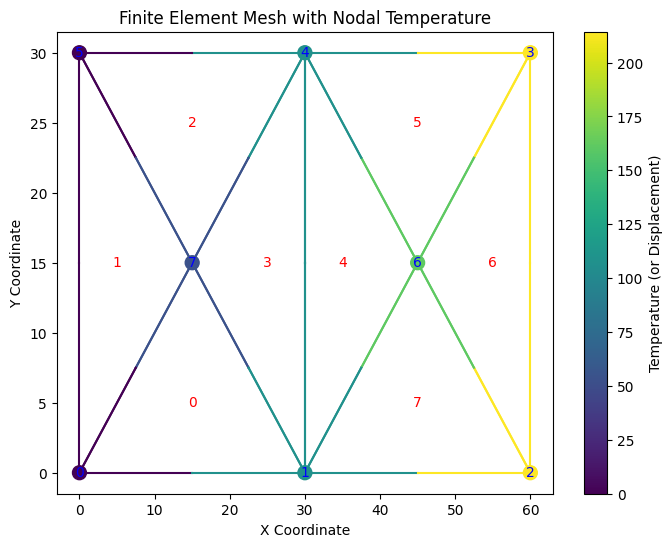

In [64]:
mesh.plot_mesh(plot_element=True,plot_node=True,plot_temperature=True)

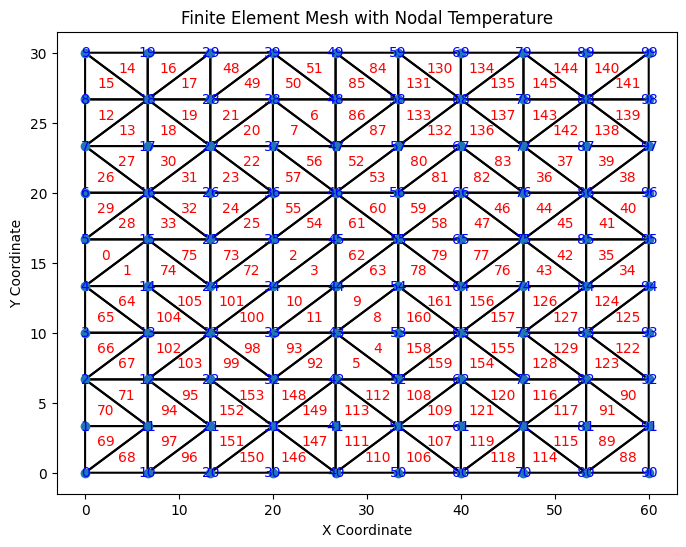

In [123]:
point_density = 10 #20
hole_nodes = 17 #21
width = 60
height = 30
hole_radius = int(0.1*width)
hole_center = (width/2,height/2)
buffer = 0.3#0.3 # this buffer ensures that the rectangular and circular points are not too close
x_points = np.linspace(0, width, point_density)
y_points = np.linspace(0, height, point_density)
theta = np.linspace(0,2*np.pi, hole_nodes)
hole_points = np.array([hole_center + hole_radius * np.array([np.cos(t), np.sin(t)]) for t in theta[:-1]]) #you need to remove the last theta(2pi)
node_set = np.array([[x, y] for x in x_points for y in y_points])

mesh = Mesh(node_set)
mesh.element_objects()
mesh.plot_mesh()

In [124]:
mesh.calc_global_stiffness()

Element No. 0
Nodes id used  [np.int32(4), np.int32(15), np.int32(5)]
Element No. 1
Nodes id used  [np.int32(15), np.int32(4), np.int32(14)]
Element No. 2
Nodes id used  [np.int32(34), np.int32(45), np.int32(35)]
Element No. 3
Nodes id used  [np.int32(45), np.int32(34), np.int32(44)]
Element No. 4
Nodes id used  [np.int32(43), np.int32(52), np.int32(53)]
Element No. 5
Nodes id used  [np.int32(52), np.int32(43), np.int32(42)]
Element No. 6
Nodes id used  [np.int32(38), np.int32(47), np.int32(48)]
Element No. 7
Nodes id used  [np.int32(47), np.int32(38), np.int32(37)]
Element No. 8
Nodes id used  [np.int32(54), np.int32(43), np.int32(53)]
Element No. 9
Nodes id used  [np.int32(43), np.int32(54), np.int32(44)]
Element No. 10
Nodes id used  [np.int32(34), np.int32(33), np.int32(44)]
Element No. 11
Nodes id used  [np.int32(33), np.int32(43), np.int32(44)]
Element No. 12
Nodes id used  [np.int32(18), np.int32(8), np.int32(7)]
Element No. 13
Nodes id used  [np.int32(18), np.int32(7), np.int32

In [125]:
ebc_1 = []
for i, x in enumerate(node_set):
    if x[0] == 0:
        ebc_1.append(i)

ebc_2 = []
for i, x in enumerate(node_set):
    if x[0] == width:
        ebc_2.append(i)

print("Node set used for application of essential boundary condition at x=0:", ebc_1)
print(f"Node set used for application of essential boundary condition at x={width}:", ebc_2)

Node set used for application of essential boundary condition at x=0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Node set used for application of essential boundary condition at x=60: [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [126]:
mesh.ebc_nodes = ebc_1
mesh.force_matrix[ebc_2] = 6/10

In [127]:
mesh.reduce_global_stiffness()

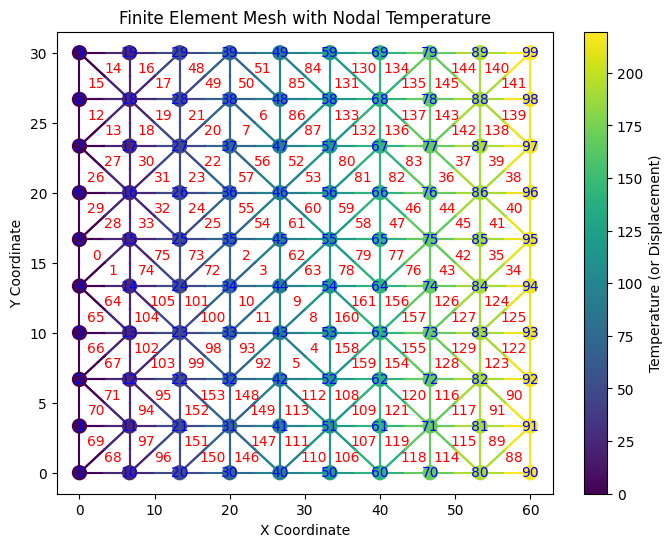

In [128]:
mesh.global_displacement = np.linalg.solve(mesh.global_stiffness_matrix,mesh.force_matrix)
mesh.plot_mesh(plot_temperature=True,plot_node=True)